In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Importing the Fashion MNIST dataset from TensorFlow Keras

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Shape of the training data:", train_images.shape)
print("shape of the training label:", train_labels.shape)
print("Shape of the test data:", test_images.shape)
print("shape of the test label:", test_labels.shape)


Shape of the training data: (60000, 28, 28)
shape of the training label: (60000,)
Shape of the test data: (10000, 28, 28)
shape of the test label: (10000,)


# Mapping class labels to their corresponding names

In [4]:
class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

unique_labels=set(train_labels)
for label in unique_labels:
     print("label:",label,"class:",class_labels[label])


label: 0 class: T-shirt/top
label: 1 class: Trouser
label: 2 class: Pullover
label: 3 class: Dress
label: 4 class: Coat
label: 5 class: Sandal
label: 6 class: Shirt
label: 7 class: Sneaker
label: 8 class: Bag
label: 9 class: Ankle boot


# Calculate and print the distribution of classes in both the training and test datasets


In [5]:
import numpy as np

# Define class names for readability
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Calculate distribution in the training set
unique_train, counts_train = np.unique(train_labels, return_counts=True)
train_distribution = dict(zip(class_names, counts_train))

# Calculate distribution in the test set
unique_test, counts_test = np.unique(test_labels, return_counts=True)
test_distribution = dict(zip(class_names, counts_test))

# Print the distributions
print("Distribution of classes in the training dataset:")
for class_name, count in train_distribution.items():
    print(f"{class_name}: {count}")

print("\nDistribution of classes in the test dataset:")
for class_name, count in test_distribution.items():
    print(f"{class_name}: {count}")


Distribution of classes in the training dataset:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000

Distribution of classes in the test dataset:
T-shirt/top: 1000
Trouser: 1000
Pullover: 1000
Dress: 1000
Coat: 1000
Sandal: 1000
Shirt: 1000
Sneaker: 1000
Bag: 1000
Ankle boot: 1000


# Visualizing the distribution of classes in the dataset using histograms for both training and test datasets


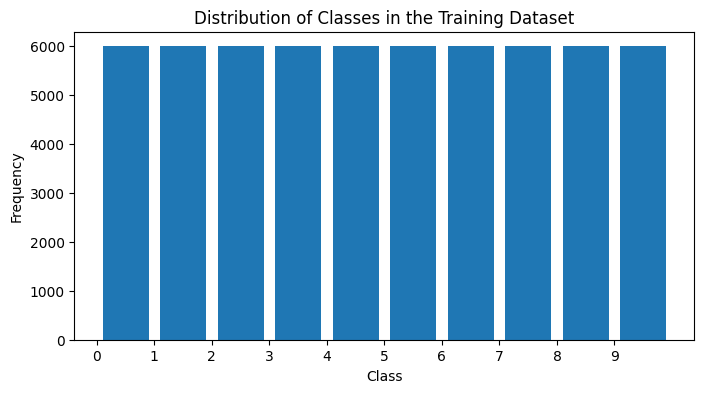

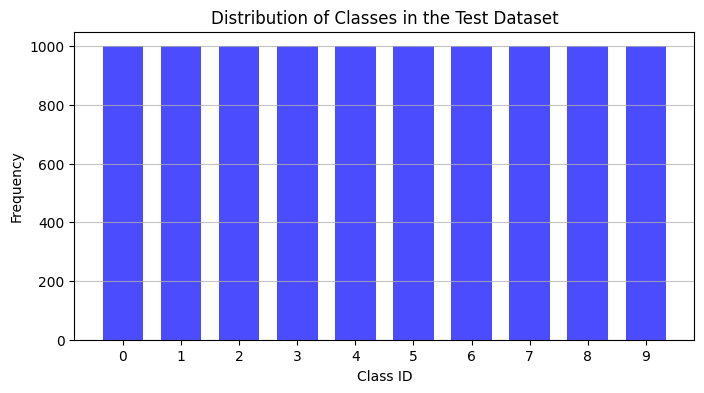

In [6]:
#Distribution of Classes in the Dataset
plt.figure(figsize=(8,4))
plt.hist(train_labels, bins=np.arange(11),rwidth=0.8)
plt.xticks(np.arange(10))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in the Training Dataset')
plt.show()

#distribution of classes in training dataset
plt.figure(figsize=(8, 4))
plt.hist(test_labels, bins=np.arange(11) - 0.5, rwidth=0.7, color='blue', alpha=0.7)
plt.title('Distribution of Classes in the Test Dataset')
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.xticks(np.arange(10))
plt.grid(axis='y', alpha=0.75)
plt.show()




# Visualizing the average image for each class in the training dataset


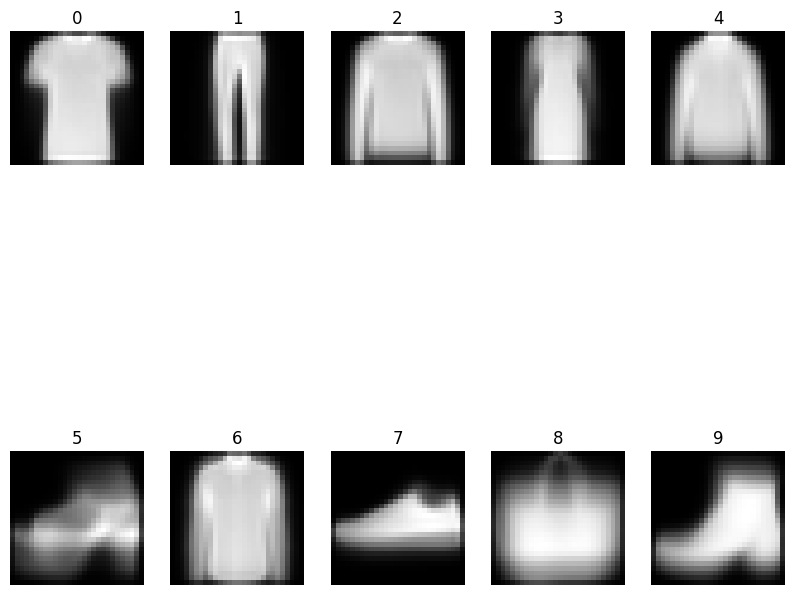

In [7]:
#Average Image for Each Class

plt.figure(figsize=(10, 10))
axis = []

for i in range(10):
    axis.append(plt.subplot(2, 5, i+1))  # Create subplots and store references in axis
    idxs = np.where(train_labels == i)[0]
    mean_img = np.mean(train_images[idxs], axis=0)
    plt.imshow(mean_img, cmap='gray')
    plt.axis('off')
    plt.title(i)  # Set title for the current subplot

plt.show()


# Visualizing the distribution of pixel values across all images in the training dataset


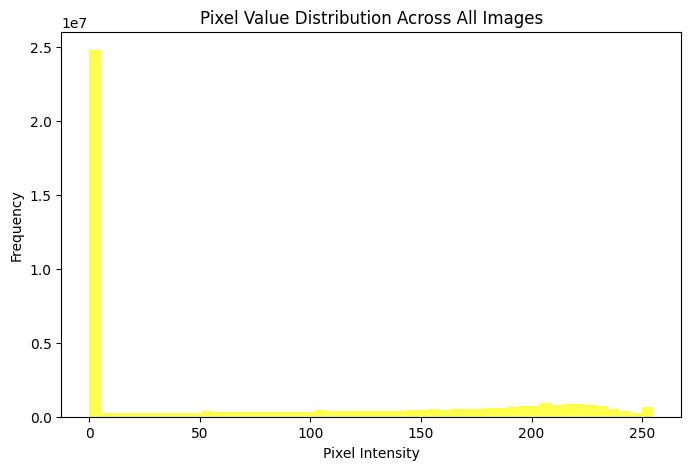

In [8]:
plt.figure(figsize=(8, 5))
pixels = train_images.flatten()
plt.hist(pixels, bins=50, color='yellow', alpha=0.7)
plt.title('Pixel Value Distribution Across All Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Normalize the images
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

In [10]:
# Flatten the images for PCA and ANN input
train_images_flat = train_images_normalized.reshape((train_images.shape[0], -1))
test_images_flat = test_images_normalized.reshape((test_images.shape[0], -1))

In [11]:
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Applying Principal Component Analysis (PCA) to reduce the dimensionality of the flattened training images to 2D


In [12]:
pca = PCA(n_components=2)
pca_result_2d = pca.fit_transform(train_images_flat)

# Visualizing the result of PCA with 2 components, color-coded by class labels


Text(0, 0.5, 'Principal Component 2')

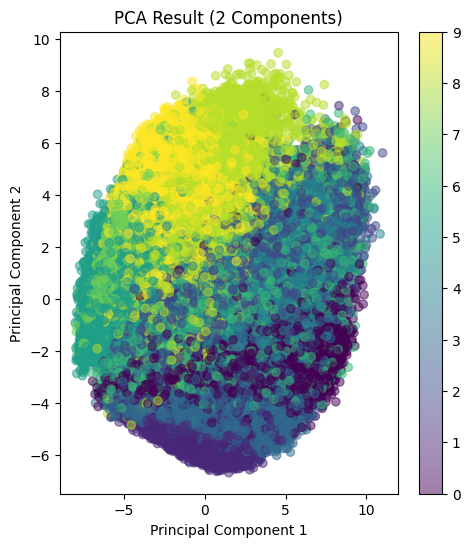

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result_2d[:, 0], pca_result_2d[:, 1], c=train_labels, alpha=0.5, cmap='viridis')
plt.colorbar()
plt.title('PCA Result (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Fitting PCA to the flattened training images to explore variance explained by different number of components


In [14]:
pca_full = PCA()
pca_full.fit(train_images_flat)

PCA()

# Visualizing the cumulative explained variance by the number of components in PCA


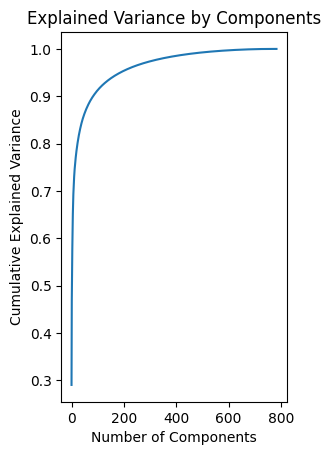

In [15]:
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

# Building Sequential ANN model with multiple Dense layers for classification

In [16]:
model = Sequential([
    Flatten(input_shape=(28*28,)),
    Dense(512, activation='relu'),  # Larger layer
    Dense(256, activation='relu'),  # Additional layer
    Dense(128, activation='sigmoid'),  # Additional layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model using the flattened and normalized data
history = model.fit(train_images_flat, train_labels_one_hot, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 22s 14ms/step - loss: 0.4984 - accuracy: 0.8215 - val_loss: 0.3751 - val_accuracy: 0.8599
Epoch 2/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3685 - accuracy: 0.8641 - val_loss: 0.3727 - val_accuracy: 0.8651
Epoch 3/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3297 - accuracy: 0.8783 - val_loss: 0.3334 - val_accuracy: 0.8795
Epoch 4/15
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3025 - accuracy: 0.8874 - val_loss: 0.3334 - val_accuracy: 0.8758
Epoch 5/15
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2848 - accuracy: 0.8934 - val_loss: 0.3300 - val_accuracy: 0.8793
Epoch 6/15
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2689 - accuracy: 0.8984 - val_loss: 0.3289 - val_accuracy: 0.8840
Epoch 7/15
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2539 - accuracy: 0.9045 - val_loss: 0.3123 -

* Evaluating the model on the test dataset and printing the test loss and accuracy


In [19]:
test_loss, test_accuracy = model.evaluate(test_images_flat, test_labels_one_hot)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.3358 - accuracy: 0.8916
Test Loss: 0.3358350098133087
Test Accuracy: 0.8916000127792358


# Visualizing the training and validation accuracy and loss over epochs


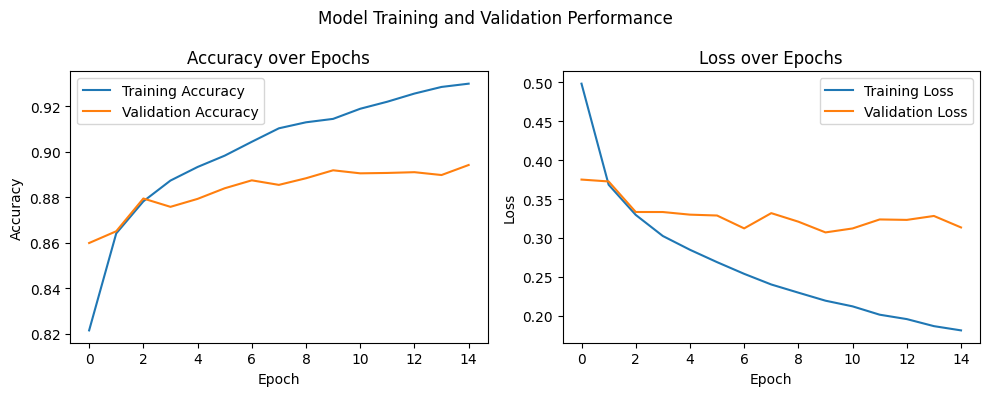

In [20]:
plt.figure(figsize=(10, 4))

# Training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Model Training and Validation Performance")
plt.tight_layout()
plt.show()

# Making predictions on the test images and displaying a few images with their predicted and true labels


313/313 [==============================] - 2s 5ms/step


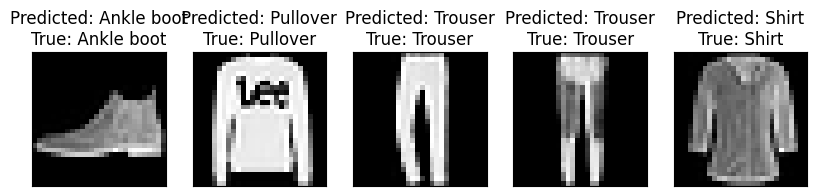

In [21]:
predictions = model.predict(test_images_flat)
predicted_classes = np.argmax(predictions, axis=1)

# Define class names to map the label indices to actual fashion items
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display a few images with predictions
num_images = 5
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}\nTrue: {class_names[test_labels[i]]}")
plt.show()